## ECG Analysis

In this notebook, we will focus on cleaning and analyzing our ECG signals. 


#### Possibly useful packages
- [ECG cleaning and more](https://neuropsychology.github.io/NeuroKit/functions/ecg.html)

### Sprint 1
- Data cleaning
- Exploratory Data Analysis (Patient Metadata and Medical)
- Fourier Analysis (ECGs themselves)
    - Noise removal 
    - Detecting arrhythmia
    

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wfdb
%autosave 300

Autosaving every 300 seconds


We will use the `wfdb` package to read our files 

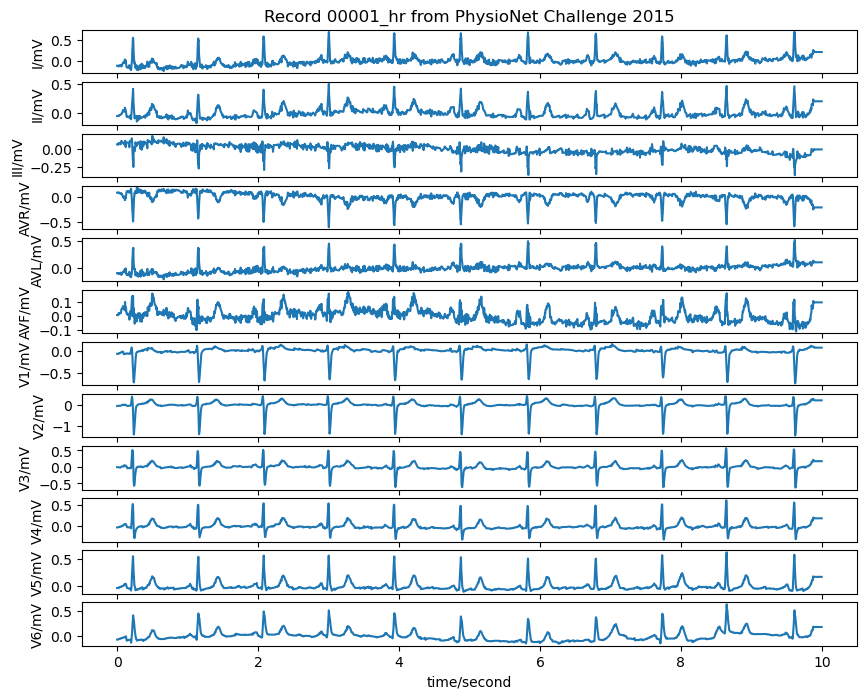

In [14]:
path = '../data/physionet.org/files/ptb-xl/1.0.3/records500/00000/'

record = wfdb.rdrecord(path+'00001_hr')
wfdb.plot_wfdb(record=record, title='Record 00001_hr from PhysioNet Challenge 2015', figsize=(10,8)) 
# display(record.__dict__)

Metadata: 
 {'fs': 500, 'sig_len': 5000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['I'], 'comments': []}


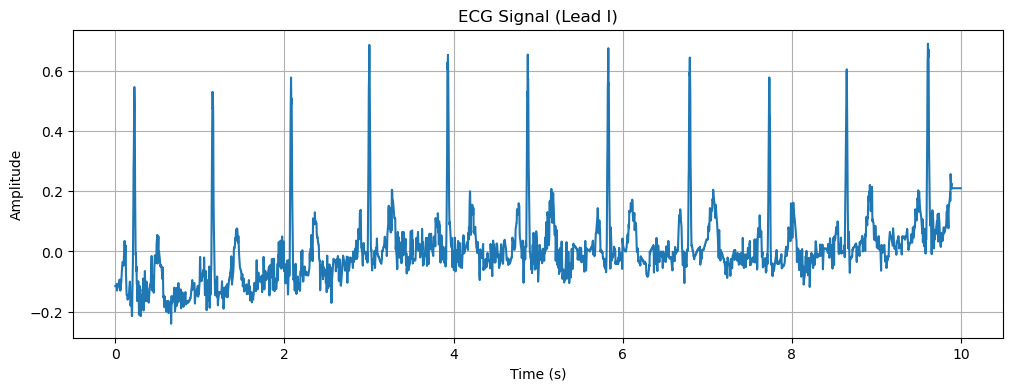

In [15]:
file = path+'00001_hr'


# Read signal and metadata
signals, fields = wfdb.rdsamp(file, channels=[0])  # Change channels=[0] based on your needs

sampling_frequency = fields['fs']  # Sampling frequency
sig_len = fields['sig_len'] # Signal length 
sig_name = fields['sig_name'] # Lead

# Print metadata
print("Metadata: \n", fields)

# Convert to time series
time = np.arange(0, sig_len) / sampling_frequency
#time = [i / sampling_frequency for i in range(sig_len)]

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, signals)
plt.title('ECG Signal (Lead {})'.format(sig_name[0]))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Fourier Analysis 

**Example 1**
- Testing out FFT on ECG above

First we get the sampling interval, $T$. We know that $T = \frac{1}{f_s}$ where $f_s$ is the sampling frequency. 

In [16]:
# First we get the sampling interval 
dt = 1/sampling_frequency

Note that the ECG signal is given in a 2D array. We need to convert it to 1D before applying FFT.
> The following method was taken from [here](https://dsp.stackexchange.com/questions/53272/fourier-transform-of-ecg-signal-in-python).

In [17]:
# Flatten the signal from 2D to 1D 
signals = signals.flatten()

Finally, we can calculate the FFT and plot it 

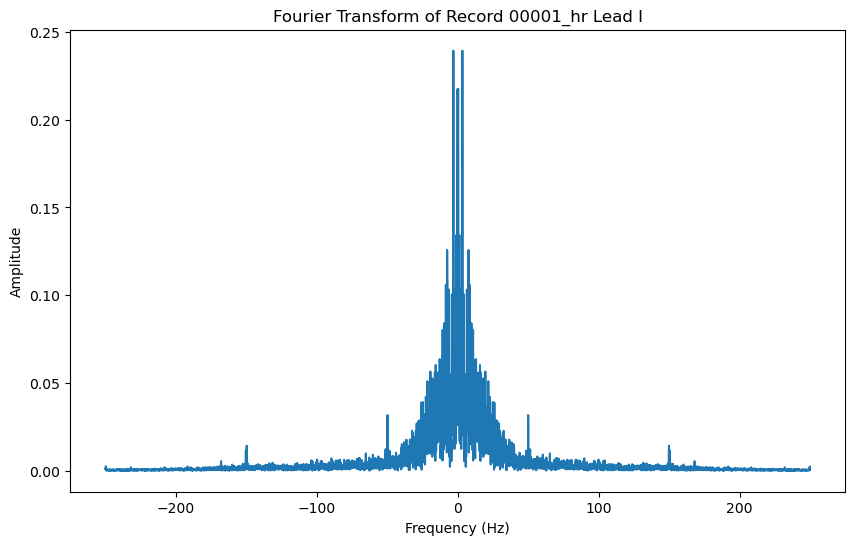

In [18]:
# FFT returns a result not centered at zero, therefore we need to fftshift it to zero
signal_fft = np.fft.fftshift(np.fft.fft(signals) * dt)
freq = np.fft.fftshift(np.fft.fftfreq(sig_len, dt))

plt.figure(figsize=(10,6))
plt.plot(freq, np.abs(signal_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Record 00001_hr Lead %s' % (sig_name[0]))
# plt.xlim(-200, 200)
plt.show()

**Example 2**
- Let's try to do the same thing for lead V4 which has less artifact in it

Metadata: 
 {'fs': 500, 'sig_len': 5000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['V4'], 'comments': []}


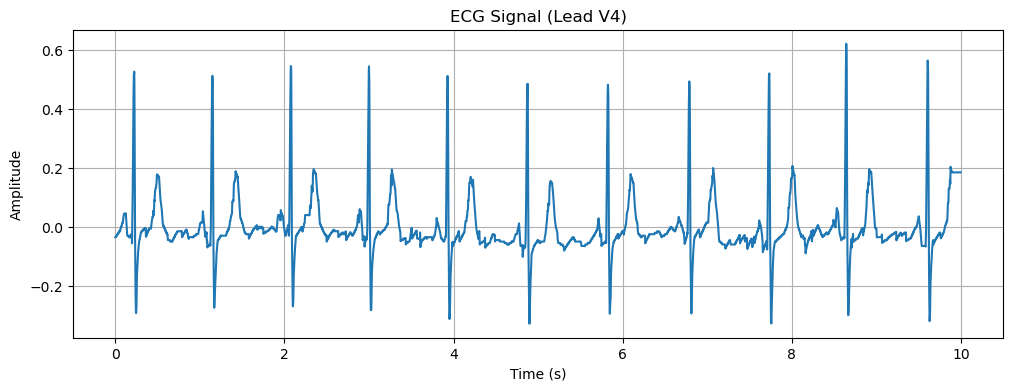

In [19]:
# Read signal and metadata
signals, fields = wfdb.rdsamp(file, channels=[9])  # Change channels=[0] based on your needs

sampling_frequency = fields['fs']  # Sampling frequency
sig_len = fields['sig_len'] # Signal length 
sig_name = fields['sig_name'] # Lead

# Print metadata
print("Metadata: \n", fields)

# Convert to time series
time = np.arange(0, sig_len) / sampling_frequency
#time = [i / sampling_frequency for i in range(sig_len)]

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, signals)
plt.title('ECG Signal (Lead {})'.format(sig_name[0]))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

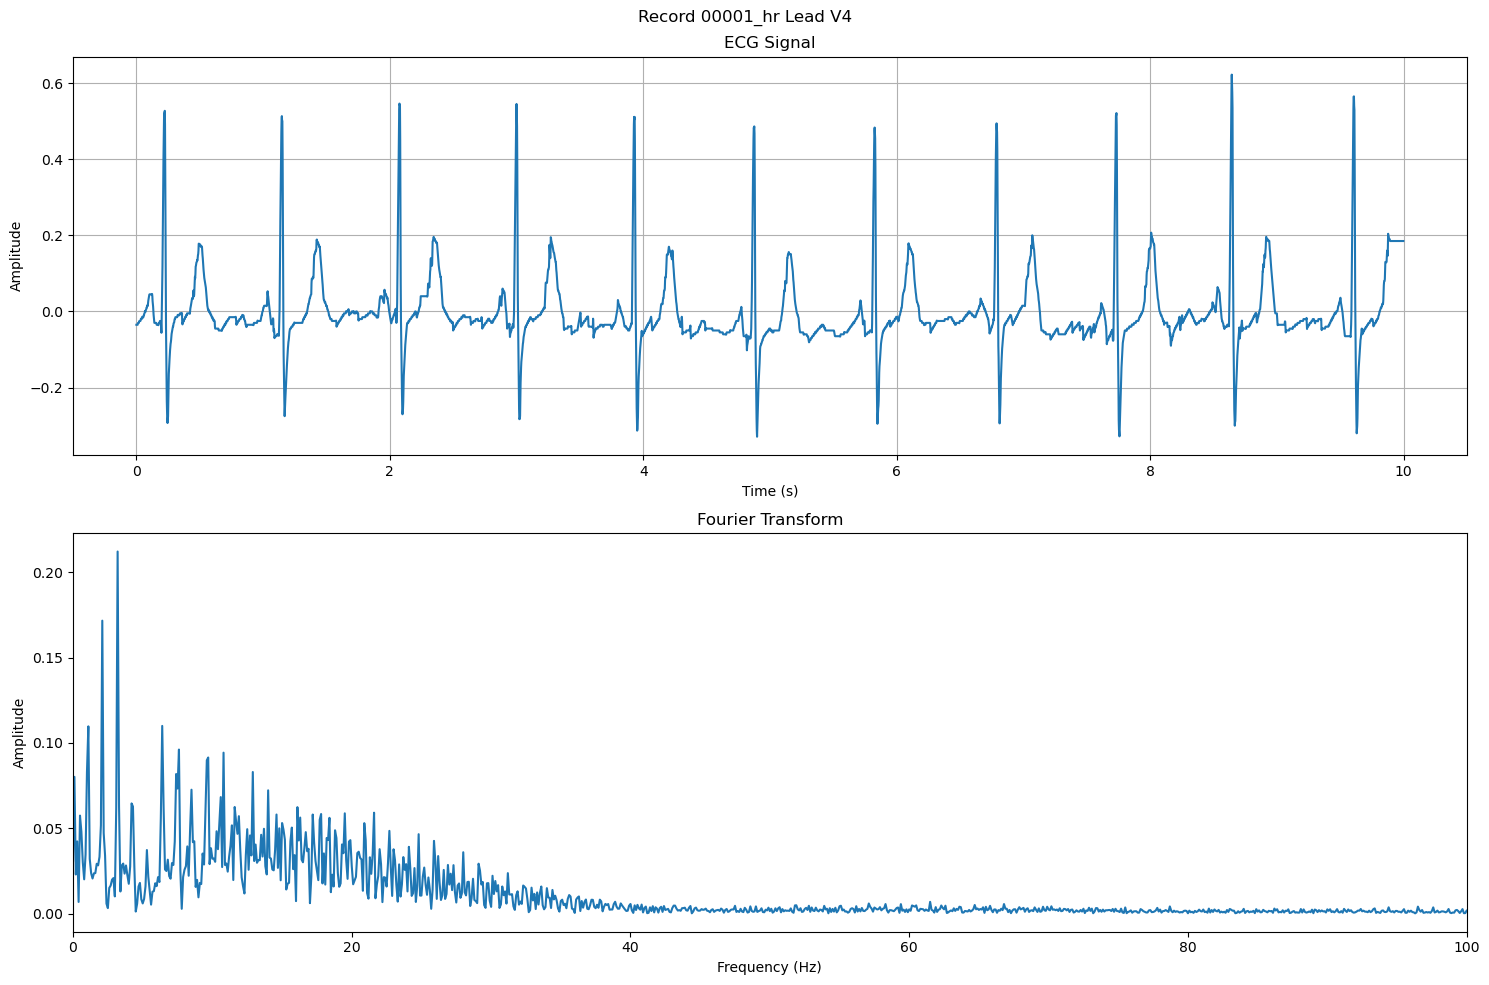

In [20]:
# First we get the sampling interval 
dt = 1/sampling_frequency

# Flatten the signal from 2D to 1D 
signals = signals.flatten()

# FFT returns a result not centered at zero, therefore we need to fftshift it to zero
signal_fft = np.fft.fftshift(np.fft.fft(signals) * dt)
freq = np.fft.fftshift(np.fft.fftfreq(sig_len, dt))

fig, ax = plt.subplots(2, 1, figsize=(15,10))

fig.suptitle("Record 00001_hr Lead %s" % (sig_name[0]))
ax[0].plot(time, signals)
ax[0].set_title('ECG Signal')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)
ax[1].plot(freq, np.abs(signal_fft))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Fourier Transform')
ax[1].set_xlim(0, 100)
fig.tight_layout()
 

**Types of ECG Noise**:
- 

### Annotations

**Data Dictionanry**

- diagnosis : 
- description : 
- diagnoastic
- form :
- rhythm :
- diagnostic class :
- dignostic subclass : 
- Statement Category : 
- SCP-ECG Statement Description : 
- AHA code :
- aECG REFID :
- CDISC Code : 
- DICOM Code :